# Fruit and Veggie price analysis

## Data Source
The data comes from the USDA Economic Eesearch Service estimates of average costs of fruits and vegetables. The datasets can be found on the [USDA website](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices).

In [39]:
import numpy as np
import pandas as pd
import matplotlib as plt

## Importing and Exploring the Datasets

In [40]:
justFruit = pd.read_csv('Fruit-Prices-2022.csv')
justVeggies = pd.read_csv('Vegetable-Prices-2022.csv')

In [41]:
justFruit.head()

,Fruit,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145


In [42]:
justVeggies.head()

,Vegetable,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961
1,Artichoke,Fresh,2.4703,per pound,0.3750,0.3858,pounds,2.5415
2,Artichoke,Canned,3.4498,per pound,0.6500,0.3858,pounds,2.0476
3,Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731
4,Asparagus,Canned,3.4328,per pound,0.6500,0.3968,pounds,2.0958


In [43]:
renamedFruit = justFruit.rename(columns={'Fruit':'Name'}, inplace=False)
renamedFruit['Type'] = 'Fruit'
renamedFruit.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Apples,Fresh,1.8541,per pound,0.90,0.2425,pounds,0.4996,Fruit
1,"Apples, applesauce",Canned,1.1705,per pound,1.00,0.5401,pounds,0.6323,Fruit
2,"Apples, ready-to-drink",Juice,0.8699,per pint,1.00,8.0000,fluid ounces,0.4349,Fruit
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.00,8.0000,fluid ounces,0.3043,Fruit
4,Apricots,Fresh,3.6162,per pound,0.93,0.3638,pounds,1.4145,Fruit


In [44]:
renamedVeggies = justVeggies.rename(columns={'Vegetable':'Name'}, inplace=False)
renamedVeggies['Type'] = 'Vegetable'
renamedVeggies.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961,Vegetable
1,Artichoke,Fresh,2.4703,per pound,0.3750,0.3858,pounds,2.5415,Vegetable
2,Artichoke,Canned,3.4498,per pound,0.6500,0.3858,pounds,2.0476,Vegetable
3,Asparagus,Fresh,2.9531,per pound,0.4938,0.3968,pounds,2.3731,Vegetable
4,Asparagus,Canned,3.4328,per pound,0.6500,0.3968,pounds,2.0958,Vegetable


In [45]:
allPriceData = pd.merge(renamedFruit,renamedVeggies, how='outer')
allPriceData.head()

,Name,Form,RetailPrice,RetailPriceUnit,Yield,CupEquivalentSize,CupEquivalentUnit,CupEquivalentPrice,Type
0,Acorn squash,Fresh,1.2136,per pound,0.4586,0.4519,pounds,1.1961,Vegetable
1,Apples,Fresh,1.8541,per pound,0.9000,0.2425,pounds,0.4996,Fruit
2,"Apples, applesauce",Canned,1.1705,per pound,1.0000,0.5401,pounds,0.6323,Fruit
3,"Apples, frozen concentrate",Juice,0.6086,per pint,1.0000,8.0000,fluid ounces,0.3043,Fruit
4,"Apples, ready-to-drink",Juice,0.8699,per pint,1.0000,8.0000,fluid ounces,0.4349,Fruit


In [46]:
allPriceData.groupby(['Form'])['Type'].count()

Form
Canned    36
Dried     17
Fresh     66
Frozen    25
Juice     11
Name: Type, dtype: int64

<Axes: xlabel='Form'>

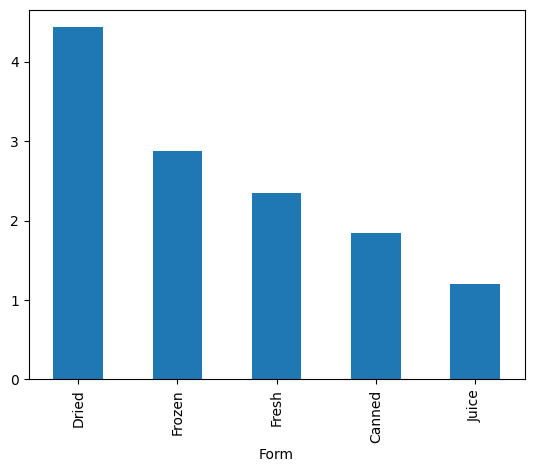

In [49]:
bar1 = allPriceData.groupby(['Form'])['RetailPrice'].mean()
pd.Series.sort_values(bar1, ascending=False ,inplace=True)
bar1.plot.bar()

<Axes: xlabel='Form'>

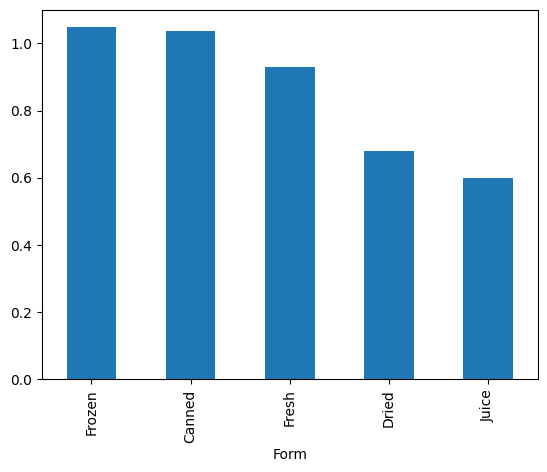

In [ ]:
bar2 = allPriceData.groupby(['Form'])['CupEquivalentPrice'].mean()
pd.Series.sort_values(bar2, ascending=False ,inplace=True)
bar2.plot.bar()

In [48]:
allPriceData.groupby(['Type','Form'])['Name'].count()

Type       Form  
Fruit      Canned    12
           Dried      9
           Fresh     24
           Frozen     6
           Juice     11
Vegetable  Canned    24
           Dried      8
           Fresh     42
           Frozen    19
Name: Name, dtype: int64